In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
data = pd.read_csv("/content/sample_data/train_product_data - train_product_data.csv")

In [ ]:
df = pd.DataFrame(data)

In [ ]:
data.shape

(14999, 15)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  14999 non-null  object 
 1   crawl_timestamp          14999 non-null  object 
 2   product_url              14999 non-null  object 
 3   product_name             14999 non-null  object 
 4   product_category_tree    14999 non-null  object 
 5   pid                      14999 non-null  object 
 6   retail_price             14942 non-null  float64
 7   discounted_price         14942 non-null  float64
 8   image                    14996 non-null  object 
 9   is_FK_Advantage_product  14999 non-null  bool   
 10  description              14998 non-null  object 
 11  product_rating           14999 non-null  object 
 12  overall_rating           14999 non-null  object 
 13  brand                    10289 non-null  object 
 14  product_specifications

In [ ]:
# Split the product_category_tree column by ">>" and extract the first level category
data['product_category'] = data['product_category_tree'].apply(lambda x: x.split('>>')[0].strip())

# Get the frequency count of each category
category_counts = data['product_category'].value_counts()

# Remove the leading characters from the category names
category_counts.index = category_counts.index.str[2:]

# Display the top 20 categories
categories = category_counts.head(20)

print(categories)

product_category
othing                      5316
wellery                     3218
otwear                      1083
tomotive                     937
biles & Accessories          768
me Decor & Festive Needs     714
tchen & Dining               610
mputers                      531
tches                        526
ols & Hardware               379
ys & School Supplies         271
ns & Stationery              264
by Care                      224
gs, Wallets & Belts          158
Name: count, dtype: int64


<Axes: title={'center': 'Product Category Distribution'}, xlabel='product_category'>

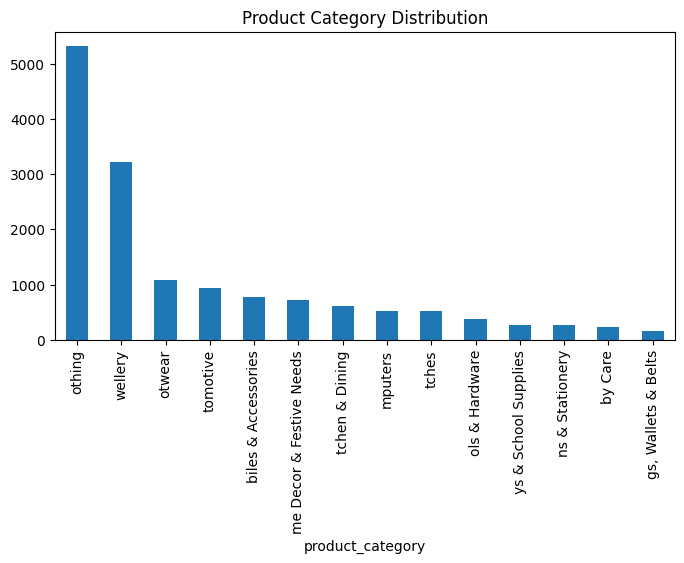

In [ ]:
fig, ax = plt.subplots(figsize=[8,4], nrows=1, ncols=1)
categories.plot(ax=ax, kind='bar', title='Product Category Distribution')


In [ ]:
# Number of missing values in each column
missing = pd.DataFrame (data.isnull().sum()).rename (columns = {0: 'missing' })
# Create a percentage of missing values
missing['percent'] = missing['missing'] / len(data)
# sorting the values in descending order to see highest count on the top
missing.sort_values ('percent', ascending = False)

,missing,percent
brand,4710,0.314021
retail_price,57,0.003800
discounted_price,57,0.003800
product_specifications,6,0.000400
image,3,0.000200
description,1,0.000067
uniq_id,0,0.000000
crawl_timestamp,0,0.000000
product_url,0,0.000000
product_name,0,0.000000


In [ ]:
# Removing missing values in description
data=data[pd.notnull(data['description'])]

In [ ]:
import seaborn as sns

Text(0.5, 1.0, 'Word distribution per bin')

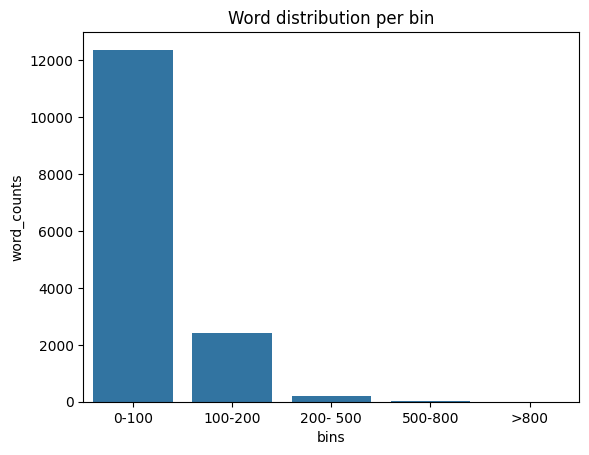

In [ ]:
data['no_of_words'] = data.description.apply(lambda a :len(a.split()))
bins=[0,50,75, np.inf]
data['bins' ]=pd. cut (data.no_of_words, bins=[0, 100, 300, 500, 800, np. inf], labels=['0-100', '100-200', '200- 500', '500-800','>800'])
words_distribution = data.groupby('bins').size().reset_index().rename (columns={0: 'word_counts'})
sns.barplot(x='bins', y='word_counts', data=words_distribution).set_title("Word distribution per bin")


In [ ]:
data['description'][8]

"Key Features of Alisha Solid Women's Cycling Shorts Cotton Lycra Black, White, Black,Specifications of Alisha Solid Women's Cycling Shorts Shorts Details Number of Contents in Sales Package Pack of 3 Fabric Cotton Lycra Type Cycling Shorts General Details Pattern Solid Ideal For Women's Fabric Care Gentle Machine Wash in Lukewarm Water, Do Not Bleach Additional Details Style Code ALTHT_3P_17 In the Box 3 shorts"

In [ ]:
# Remove punctuation
data['description'] = data['description'].str.replace(r'[^\w\d\s]', ' ')
# Replace whitespace between terms with a single space
data['description'] = data['description'] .str.replace(r'\s+', ' ')
# Remove leading and trailing whitespace
data['description'] = data['description'].str.replace(r'^\s+ |\s+?$', '')
# converting to lower case
data['description'] = data['description'].str.lower()
# Replace numbers like price values with 'numbr'
data['description'] = data['description'].str.replace(r'\d+(\.\d+)?', 'numbr')
data['description'][8]


"key features of alisha solid women's cycling shorts cotton lycra black, white, black,specifications of alisha solid women's cycling shorts shorts details number of contents in sales package pack of 3 fabric cotton lycra type cycling shorts general details pattern solid ideal for women's fabric care gentle machine wash in lukewarm water, do not bleach additional details style code altht_3p_17 in the box 3 shorts"

In [ ]:
# Removing Stopwords

import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop = stopwords.words ('english')
pattern = r'\b(?:{})\b'.format('|'.join(stop))
data['description'] = data['description'].str.replace(pattern, '')
data['description'] = data['description'].str.replace(r'\s+',' ') # Removing single characters
data['description'] = data['description'].apply(lambda a: " ".join(a for a in a.split() if len(a)>1))
data['description'][8]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"key features of alisha solid women's cycling shorts cotton lycra black, white, black,specifications of alisha solid women's cycling shorts shorts details number of contents in sales package pack of fabric cotton lycra type cycling shorts general details pattern solid ideal for women's fabric care gentle machine wash in lukewarm water, do not bleach additional details style code altht_3p_17 in the box shorts"

In [ ]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud (background_color="white", width = 800, height = 400).generate(' '.join(data['description']))


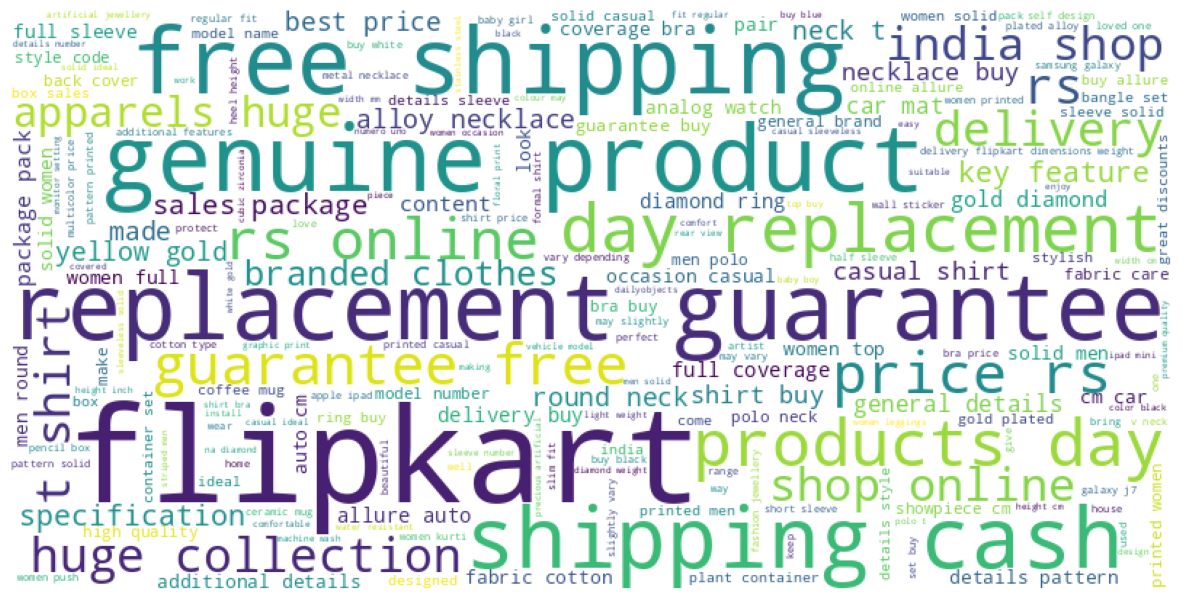

In [ ]:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
# Removing domain-related stop words from the description

specific_stop_words = ["numbr", "rs", "flipkart", "buy", "com", "free","day", "cash", "replacement", "guarantee", "genuine", "key", "feature", "delivery","products", "product", "shipping", "online", "india", "shop"]
data['description'] = data['description'].apply(lambda a: " ".join(a for a in a.split() if a not in specific_stop_words))

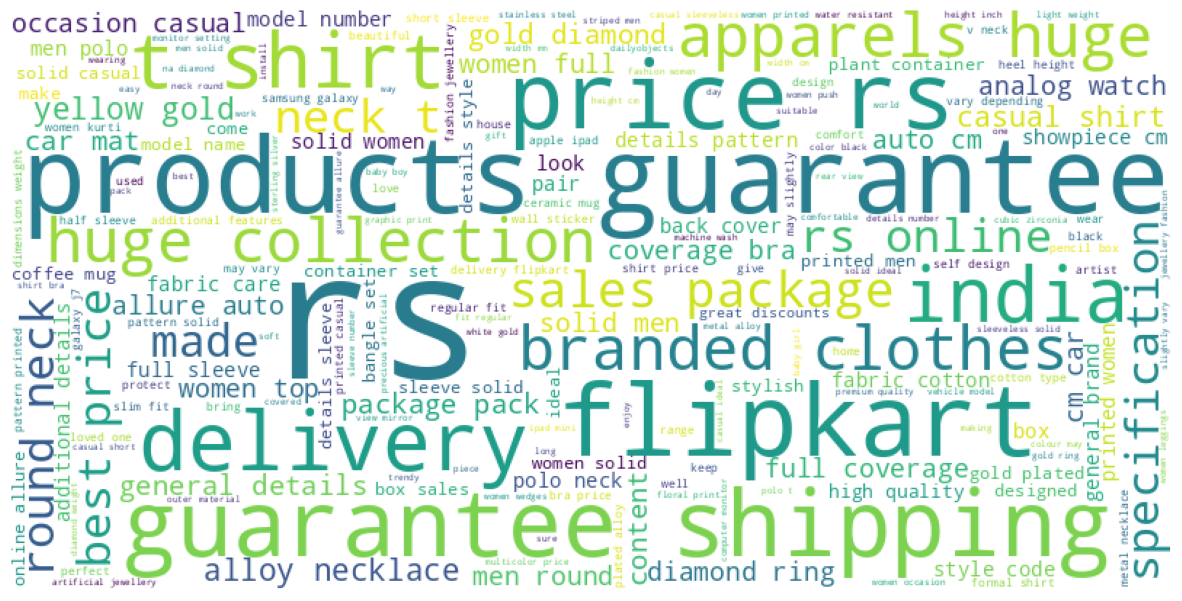

In [ ]:
wordcloud  = WordCloud (background_color="white", width = 800, height = 400).generate(''.join(data['description']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
import keras
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Flatten,Conv1D, MaxPooling1D
from keras.models import Model
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras import layers

In [ ]:
MAX_LENGTH= 200
prod_tok = Tokenizer()
prod_tok.fit_on_texts (data['description'])
clean_description = prod_tok.texts_to_sequences (data['description'])

#padding

X = pad_sequences(clean_description, maxlen = MAX_LENGTH)

In [ ]:
# Label encoder for Target variable
from sklearn.preprocessing import LabelEncoder
num_class = len (np.unique (data.product_category_tree.values))
y = data['product_category_tree'].values
encoder = LabelEncoder()
encoder.fit(y)

y = encoder.transform(y)

In [ ]:
#train test split

from sklearn.model_selection import train_test_split

indepentent_features_build, indepentent_features_valid, depentent_feature_build, depentent_feature_valid = train_test_split(X, y, test_size=0.2, random_state=1) #train 80, test 20
print (indepentent_features_build.shape)
print(indepentent_features_valid.shape)
print(depentent_feature_build.shape)
print(depentent_feature_valid.shape)

(11998, 200)
(3000, 200)
(11998,)
(3000,)


In [ ]:
model_inp = Input(shape=(MAX_LENGTH,))
vocab_size = len(prod_tok.word_index) + 1  # Adding 1 for the unknown token (index 0)
object_layer = Embedding(vocab_size, 100, input_length=MAX_LENGTH)(model_inp)
a = Flatten()(object_layer)
a = Dense(30)(a)

# Default activation function is linear, we can make use of relu.

model_pred = Dense(num_class, activation='softmax')(a)
output = Model(inputs=[model_inp], outputs=model_pred)
output.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
output.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding (Embedding)       (None, 200, 100)          2036200   
                                                                 
 flatten (Flatten)           (None, 20000)             0         
                                                                 
 dense (Dense)               (None, 30)                600030    
                                                                 
 dense_1 (Dense)             (None, 14)                434       
                                                                 
Total params: 2636664 (10.06 MB)
Trainable params: 2636664 (10.06 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
filepath="output_ANN.hdf5"
X = ModelCheckpoint (filepath, monitor= 'val_acc', verbose=1, save_best_only=True, mode='max')

#fit the model

out = output.fit([indepentent_features_build], batch_size=64, y=to_categorical (depentent_feature_build), verbose=1, validation_split=0.25, shuffle=True, epochs=50, callbacks=[X])

#predict

output_pred = output.predict(indepentent_features_valid)
output_pred = np.argmax(output_pred, axis=1)
accuracy_score = (depentent_feature_valid, output_pred)


Epoch 1/50
141/141 [==============================] - ETA: 0s - loss: 0.9154 - acc: 0.7499
Epoch 1: val_acc improved from -inf to 0.89800, saving model to output_ANN.hdf5
141/141 [==============================] - 7s 41ms/step - loss: 0.9154 - acc: 0.7499 - val_loss: 0.3857 - val_acc: 0.8980
Epoch 2/50
  3/141 [..............................] - ETA: 3s - loss: 0.3253 - acc: 0.9375

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


139/141 [============================>.] - ETA: 0s - loss: 0.1917 - acc: 0.9566
Epoch 2: val_acc improved from 0.89800 to 0.94333, saving model to output_ANN.hdf5
141/141 [==============================] - 4s 28ms/step - loss: 0.1910 - acc: 0.9569 - val_loss: 0.1986 - val_acc: 0.9433
Epoch 3/50
140/141 [============================>.] - ETA: 0s - loss: 0.0661 - acc: 0.9850
Epoch 3: val_acc improved from 0.94333 to 0.95400, saving model to output_ANN.hdf5
141/141 [==============================] - 4s 26ms/step - loss: 0.0659 - acc: 0.9851 - val_loss: 0.1587 - val_acc: 0.9540
Epoch 4/50
139/141 [============================>.] - ETA: 0s - loss: 0.0304 - acc: 0.9927
Epoch 4: val_acc did not improve from 0.95400
141/141 [==============================] - 7s 48ms/step - loss: 0.0309 - acc: 0.9923 - val_loss: 0.1573 - val_acc: 0.9533
Epoch 5/50
141/141 [==============================] - ETA: 0s - loss: 0.0184 - acc: 0.9950
Epoch 5: val_acc improved from 0.95400 to 0.95700, saving model to ou

In [ ]:
model_inp  = Input (shape=(MAX_LENGTH, ))

#define embedding layer

object_layer = Embedding (vocab_size, 100, input_length=MAX_LENGTH) (model_inp)

#add LSTM layer

a = LSTM(60) (object_layer)

#add dense layer

a = Dense (30)(a) #default activation function is linear, we can make use of relu.

#final

model_pred = Dense (num_class, activation='softmax')(a)

output = Model(inputs = [model_inp], outputs=model_pred)

#compile

output.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

output.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 200, 100)          2036200   
                                                                 
 lstm (LSTM)                 (None, 60)                38640     
                                                                 
 dense_2 (Dense)             (None, 30)                1830      
                                                                 
 dense_3 (Dense)             (None, 14)                434       
                                                                 
Total params: 2077104 (7.92 MB)
Trainable params: 2077104 (7.92 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score

filepath="output_LSTM.hdf5"

#model checkpoint

X = ModelCheckpoint (filepath, monitor = 'val_acc', verbose=1, save_best_only=True, mode='max')

#fitting

out = output.fit([indepentent_features_build], batch_size=64, y=to_categorical(depentent_feature_build), verbose=1, validation_split=0.25, shuffle=True, epochs=50, callbacks=[X])
output.load_weights ('output_LSTM.hdf5')

#predicting on validation data

output_pred = output.predict(indepentent_features_valid)
output_pred = np.argmax (output_pred, axis=1)

#score

accuracy_score (depentent_feature_valid, output_pred)


Epoch 1/50
141/141 [==============================] - ETA: 0s - loss: 1.3580 - acc: 0.5887
Epoch 1: val_acc improved from -inf to 0.69333, saving model to output_LSTM.hdf5
141/141 [==============================] - 39s 240ms/step - loss: 1.3580 - acc: 0.5887 - val_loss: 1.0613 - val_acc: 0.6933
Epoch 2/50
141/141 [==============================] - ETA: 0s - loss: 0.6614 - acc: 0.8175
Epoch 2: val_acc improved from 0.69333 to 0.85600, saving model to output_LSTM.hdf5
141/141 [==============================] - 32s 229ms/step - loss: 0.6614 - acc: 0.8175 - val_loss: 0.4773 - val_acc: 0.8560
Epoch 3/50
141/141 [==============================] - ETA: 0s - loss: 0.3550 - acc: 0.8953
Epoch 3: val_acc improved from 0.85600 to 0.91233, saving model to output_LSTM.hdf5
141/141 [==============================] - 32s 228ms/step - loss: 0.3550 - acc: 0.8953 - val_loss: 0.3146 - val_acc: 0.9123
Epoch 4/50
141/141 [==============================] - ETA: 0s - loss: 0.2197 - acc: 0.9352
Epoch 4: val_ac

0.9543333333333334

Text(0, 0.5, 'Validation Accuracy')

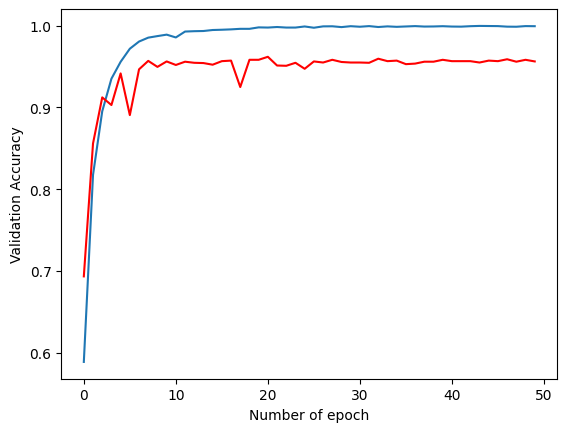

In [ ]:
dfaccuracy = pd.DataFrame({'Number of epoch': out.epoch, 'Model hist': out.history['acc'], 'Model Perd': out.history['val_acc']})

# Line for train accuracy
g = sns.lineplot(x="Number of epoch", y="Model hist", data=dfaccuracy)

# Line for test accuracy
g = sns.lineplot(x="Number of epoch", y="Model Perd", data=dfaccuracy, color='red')

# Set y-axis label
g.set_ylabel('Validation Accuracy')

In [ ]:
model_inp = Input (shape=(MAX_LENGTH, ))

# define the layer

object_layer = Embedding (vocab_size, 100, input_length=MAX_LENGTH) (model_inp)

#conv layer

a = Conv1D(60, 10) (object_layer) #default activation function is linear, we can make use of relu.

#add pooling layer

a = MaxPooling1D (pool_size=2) (a)

#add LSTM

a = LSTM(60)(a)
a = Dense (30)(a)

#final layer

model_pred = Dense (num_class, activation='softmax')(a)
output = Model (inputs = [model_inp], outputs=model_pred)

#compile

output.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics=['acc'])
output.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 200, 100)          2036200   
                                                                 
 conv1d (Conv1D)             (None, 191, 60)           60060     
                                                                 
 max_pooling1d (MaxPooling1  (None, 95, 60)            0         
 D)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 60)                29040     
                                                                 
 dense_4 (Dense)             (None, 30)                1830      
                                                           

In [ ]:
filepath="output_CNN.hdf5"

X = ModelCheckpoint (filepath, monitor= 'val_acc', verbose=1, save_best_only=True, mode='max')
out = output.fit([indepentent_features_build], batch_size=64, y=to_categorical (depentent_feature_build), verbose=1, validation_split=0.25, shuffle=True, epochs=50, callbacks=[X])
output.load_weights ('output_CNN.hdf5')
predicted = output.predict(indepentent_features_valid)
predicted = np.argmax (predicted, axis=1)
accuracy_score (depentent_feature_valid, predicted)

Epoch 1/50
141/141 [==============================] - ETA: 0s - loss: 0.9813 - acc: 0.7110
Epoch 1: val_acc improved from -inf to 0.90467, saving model to output_CNN.hdf5
141/141 [==============================] - 42s 280ms/step - loss: 0.9813 - acc: 0.7110 - val_loss: 0.3389 - val_acc: 0.9047
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


141/141 [==============================] - ETA: 0s - loss: 0.2108 - acc: 0.9408
Epoch 2: val_acc improved from 0.90467 to 0.94667, saving model to output_CNN.hdf5
141/141 [==============================] - 40s 284ms/step - loss: 0.2108 - acc: 0.9408 - val_loss: 0.2040 - val_acc: 0.9467
Epoch 3/50
141/141 [==============================] - ETA: 0s - loss: 0.0943 - acc: 0.9740
Epoch 3: val_acc improved from 0.94667 to 0.95667, saving model to output_CNN.hdf5
141/141 [==============================] - 40s 283ms/step - loss: 0.0943 - acc: 0.9740 - val_loss: 0.1655 - val_acc: 0.9567
Epoch 4/50
141/141 [==============================] - ETA: 0s - loss: 0.0531 - acc: 0.9860
Epoch 4: val_acc did not improve from 0.95667
141/141 [==============================] - 40s 287ms/step - loss: 0.0531 - acc: 0.9860 - val_loss: 0.1771 - val_acc: 0.9567
Epoch 5/50
141/141 [==============================] - ETA: 0s - loss: 0.0319 - acc: 0.9911
Epoch 5: val_acc improved from 0.95667 to 0.96400, saving model

0.97

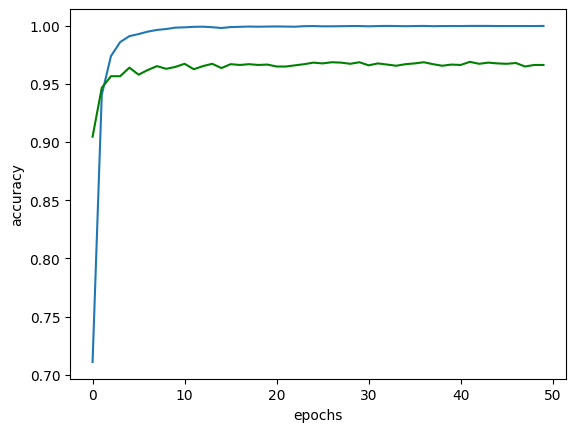

In [ ]:
dfaccuracy = pd.DataFrame({'epochs': out. epoch, 'accuracy': out. history['acc'], 'validation_accuracy': out. history['val_acc']})
# Line for train accuracy
g = sns.lineplot(x="epochs", y="accuracy", data=dfaccuracy)

# Line for test accuracy
g = sns.lineplot(x="epochs", y="validation_accuracy", data=dfaccuracy, color='green')


In [ ]:
indepentent_features_build, indepentent_features_valid, depentent_feature_build, depentent_feature_valid = train_test_split(X, y, test_size=0.2, random_state=1) #train 80, test 20


In [ ]:
# Vectorize the product names using TF-IDF
vectorizer = TfidfVectorizer()
indepentent_features_build_tfidf = vectorizer.fit_transform(indepentent_features_build)
indepentent_features_valid_tfidf = vectorizer.transform(indepentent_features_valid)

In [ ]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(indepentent_features_build_tfidf, depentent_feature_build)

LogisticRegression()

In [ ]:
# Predict the categories for the test set
y_pred = model.predict(indepentent_features_valid_tfidf)

In [ ]:
# Evaluate the model
print("Accuracy:", accuracy_score(depentent_feature_valid, y_pred))
print("Classification Report:\n", classification_report(depentent_feature_valid, y_pred))


Accuracy: 0.9686666666666667
Classification Report:
                             precision    recall  f1-score   support

                Automotive       0.96      1.00      0.98       214
                 Baby Care       0.91      0.69      0.78        42
    Bags, Wallets & Belts        0.92      0.80      0.86        30
                  Clothing       0.97      1.00      0.98      1077
                 Computers       0.94      0.96      0.95       102
                  Footwear       0.99      0.99      0.99       199
Home Decor & Festive Needs       0.95      0.98      0.96       125
                 Jewellery       0.98      1.00      0.99       664
          Kitchen & Dining       0.96      0.89      0.92       110
     Mobiles & Accessories       0.98      0.93      0.96       148
         Pens & Stationery       0.89      0.67      0.76        51
          Tools & Hardware       1.00      0.94      0.97        77
    Toys & School Supplies       0.76      0.64      0.69     

In [ ]:
# Function to categorize new products
def categorize_product(product_name):
    product_tfidf = vectorizer.transform([product_name])
    category = model.predict(product_tfidf)[0]
    return category

In [ ]:
new_product = "/content/sample_data/test_results.csv"
print(f"The category for '{new_product}' is: {categorize_product(new_product)}")

The category for '/content/sample_data/test_results.csv' is: Clothing
